# Wczytanie danych

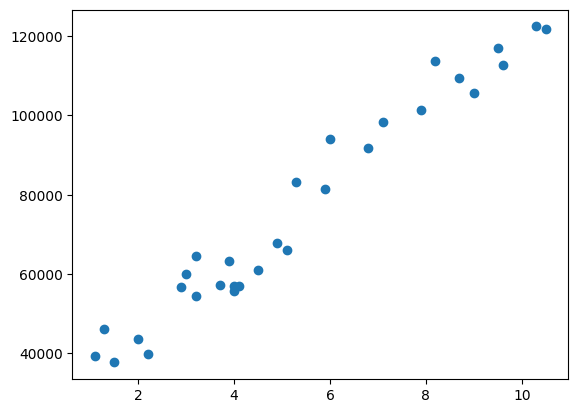

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

salary = pd.read_csv("data/salary.csv")

plt.scatter(salary["YearsExperience"], salary["Salary"])

# Regresja

In [7]:
y = salary["Salary"]
x = salary.drop(columns=["Salary"])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [9]:
model.intercept_

np.float64(25792.20019866871)

Wyraz wolny wynosi 25792$, co oznacza, że przy zerowym doświadczeniu wynagrodzenie wynosi 25792$.

In [10]:
model.coef_

array([9449.96232146])

Współczynik kierunkowy wynosi 9449$, co oznacza, że wzrost liczby lat doświadczenia o 1 rok wiąże się ze średnim wzrostem zarobków o 9449$. 

wynagrodzenie = 9449 * doświadczenie + 25792

## Ocena jakości modelu

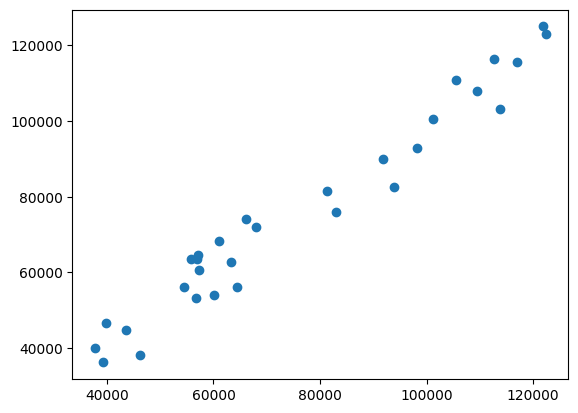

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(x)

plt.scatter(y, y_pred)

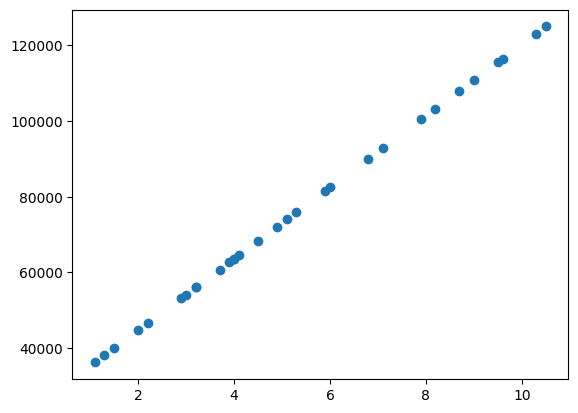

In [13]:
plt.scatter(salary["YearsExperience"], y_pred)

In [15]:
import numpy as np

print("R^2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("MAE:", mean_absolute_error(y, y_pred))

R^2: 0.9569566641435086
MSE: 31270951.722280968
RMSE: 5592.043608760662
MAE: 4644.2012894435375


Współczynnik determinacji R2 wynosi 0,96 (96%), co oznacza, że model wyjaśnia 96% zmienności wynagrodzenia.
RMSE wynosi 5592$ co oznacza, że średni błąd modelu wynosi 5592$.
MAE wynosi 4644$, co oznacza, że średni błąd bezwzględny wynosi 4644$.

In [ ]:
! pip install statsmodels

In [19]:
import statsmodels.api as sm

x_const = sm.add_constant(x)
model_sm = sm.OLS(y, x_const).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:               sob., 24 maj 2025   Prob (F-statistic):           1.14e-20
Time:                        12:06:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     